# Flight Price Prediction

imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_excel('Data_Train.xlsx')

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.shape

(10683, 11)

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
df[df['Source']=='Delhi' ]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625
10,Air India,1/06/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,8907
15,Air India,3/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 04 Mar,26h 35m,2 stops,No info,14011
16,SpiceJet,15/04/2019,Delhi,Cochin,DEL → PNQ → COK,08:45,13:15,4h 30m,1 stop,No info,5830
...,...,...,...,...,...,...,...,...,...,...,...
10669,Air India,15/06/2019,Delhi,Cochin,DEL → BOM → COK,08:00,19:15,11h 15m,1 stop,No info,9929
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150
10673,Jet Airways,27/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15h,2 stops,No info,16704
10676,Multiple carriers,1/05/2019,Delhi,Cochin,DEL → BOM → COK,10:20,19:00,8h 40m,1 stop,No info,9794


In [10]:
#we can't able to replace NaN values without any extreme domain knowledge. So, i am dropping this row.

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

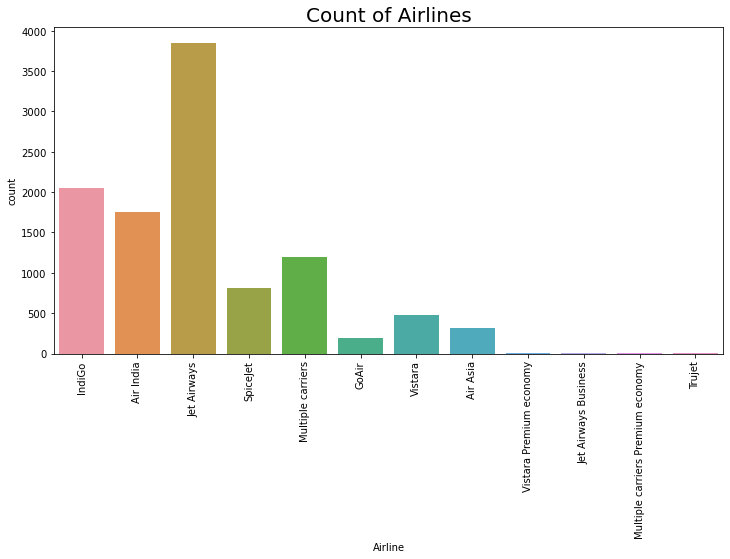

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(df['Airline'])
plt.title('Count of Airlines', size=20)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

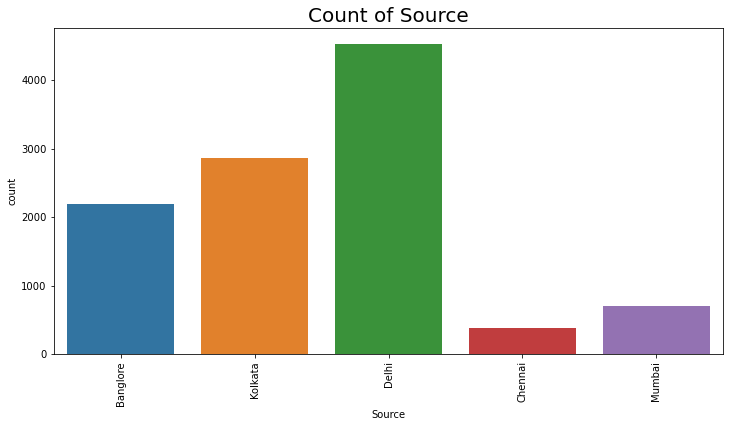

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(df['Source'])
plt.title('Count of Source', size=20)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

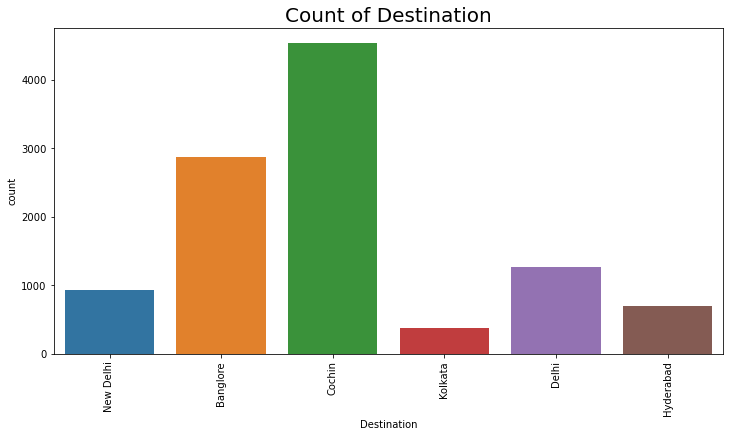

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(df['Destination'])
plt.title('Count of Destination', size=20)
plt.xticks(rotation=90)

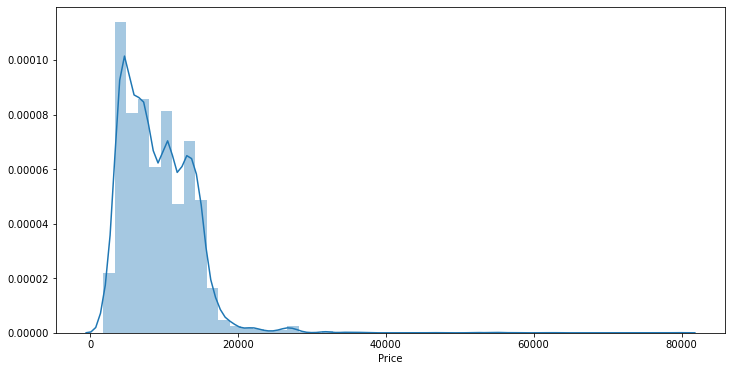

In [17]:
plt.figure(figsize=(12,6))
sns.distplot(df['Price'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

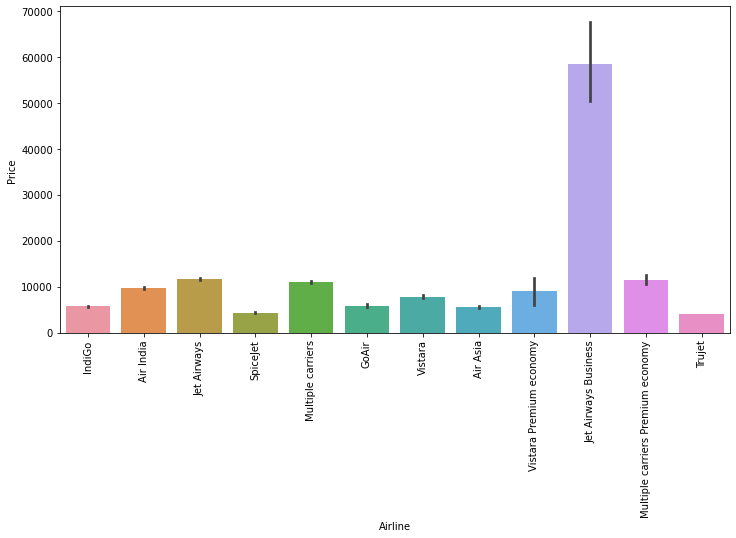

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(df['Airline'],df['Price'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

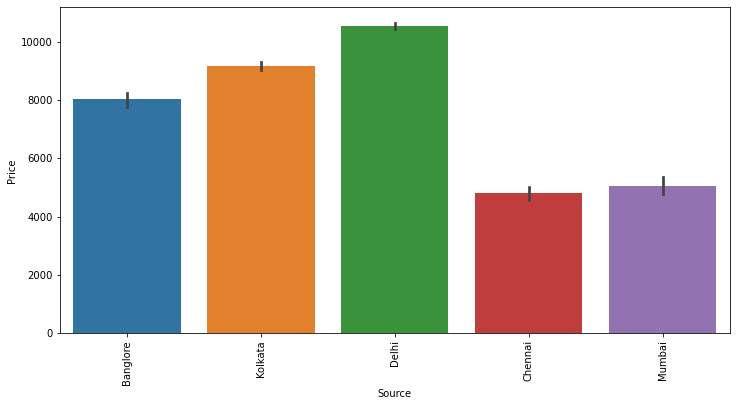

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(df['Source'],df['Price'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

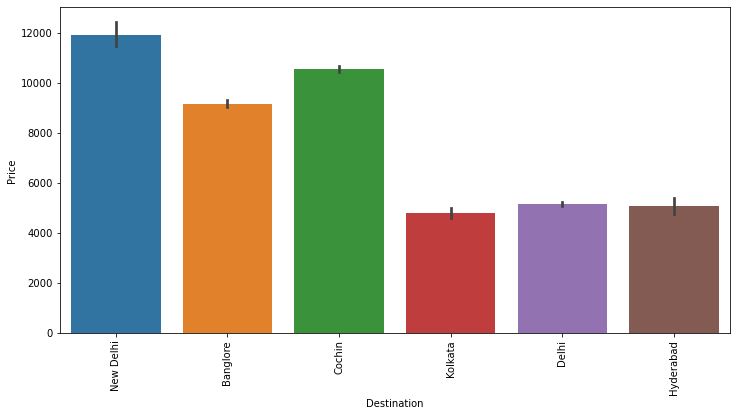

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(df['Destination'],df['Price'])
plt.xticks(rotation=90)

In [21]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [22]:
df['journey_date'] = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.day
df['journey_month'] = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [24]:
df['dep_hr'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [25]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,dep_hr,dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [26]:
df['arival_hr'] = pd.to_datetime(df['Arrival_Time']).dt.hour

In [27]:
df['arival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [28]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,dep_hr,dep_min,arival_hr,arival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [29]:
df.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [30]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,dep_hr,dep_min,arival_hr,arival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [31]:
df['Duration'].head(18)

0      2h 50m
1      7h 25m
2         19h
3      5h 25m
4      4h 45m
5      2h 25m
6     15h 30m
7      21h 5m
8     25h 30m
9      7h 50m
10    13h 15m
11     2h 35m
12     2h 15m
13    12h 10m
14     2h 35m
15    26h 35m
16     4h 30m
17    22h 35m
Name: Duration, dtype: object

In [32]:
dur= list(df['Duration'])
dur_hr=[]
dur_min=[]
for a in dur:
    
    if 'm'not in a:
        l =int(a.split('h')[0])
        m=0
        dur_hr.append(l)
        dur_min.append(m)
    elif 'h' not in a:
        m=int(a.split('m')[0])
        l=0
        dur_hr.append(l)
        dur_min.append(m)
    elif 'h' and 'm' in a:
        l =int(a.split('h')[0])
        m = int(a.split('m')[0].split()[-1])
        dur_hr.append(l)
        dur_min.append(m)
        
        
    
    
    

    

In [33]:
dur_hr

[2,
 7,
 19,
 5,
 4,
 2,
 15,
 21,
 25,
 7,
 13,
 2,
 2,
 12,
 2,
 26,
 4,
 22,
 23,
 20,
 5,
 15,
 2,
 2,
 13,
 15,
 5,
 5,
 2,
 2,
 2,
 13,
 2,
 22,
 5,
 10,
 5,
 2,
 6,
 11,
 11,
 8,
 22,
 2,
 12,
 2,
 2,
 2,
 16,
 19,
 3,
 25,
 2,
 3,
 2,
 16,
 15,
 2,
 6,
 25,
 12,
 27,
 10,
 10,
 2,
 10,
 2,
 1,
 13,
 2,
 1,
 26,
 7,
 13,
 5,
 2,
 2,
 1,
 19,
 2,
 14,
 2,
 22,
 9,
 10,
 21,
 5,
 18,
 12,
 18,
 9,
 11,
 17,
 13,
 2,
 2,
 2,
 3,
 1,
 16,
 12,
 12,
 7,
 24,
 2,
 8,
 7,
 14,
 30,
 19,
 15,
 2,
 12,
 10,
 5,
 15,
 16,
 10,
 2,
 11,
 2,
 1,
 14,
 20,
 2,
 23,
 18,
 16,
 2,
 2,
 8,
 16,
 3,
 2,
 14,
 23,
 21,
 21,
 2,
 10,
 8,
 8,
 5,
 8,
 11,
 27,
 8,
 20,
 4,
 8,
 2,
 24,
 2,
 12,
 12,
 23,
 16,
 2,
 25,
 26,
 28,
 2,
 25,
 9,
 4,
 15,
 1,
 2,
 9,
 2,
 22,
 3,
 11,
 9,
 12,
 17,
 5,
 25,
 20,
 13,
 18,
 1,
 9,
 16,
 2,
 4,
 5,
 24,
 2,
 2,
 4,
 25,
 6,
 3,
 18,
 2,
 12,
 19,
 2,
 8,
 9,
 2,
 3,
 2,
 12,
 2,
 9,
 2,
 9,
 29,
 2,
 5,
 9,
 10,
 4,
 1,
 11,
 2,
 2,
 10,
 2,
 10,
 1,
 9,
 

In [34]:
dur_min

[50,
 25,
 0,
 25,
 45,
 25,
 30,
 5,
 30,
 50,
 15,
 35,
 15,
 10,
 35,
 35,
 30,
 35,
 0,
 35,
 10,
 20,
 50,
 55,
 20,
 10,
 45,
 55,
 50,
 15,
 15,
 25,
 50,
 0,
 30,
 25,
 15,
 30,
 15,
 55,
 5,
 30,
 5,
 45,
 0,
 50,
 50,
 15,
 5,
 55,
 15,
 20,
 50,
 0,
 50,
 15,
 5,
 15,
 30,
 5,
 25,
 20,
 15,
 30,
 15,
 25,
 50,
 30,
 20,
 15,
 25,
 30,
 20,
 30,
 0,
 45,
 50,
 30,
 5,
 15,
 50,
 40,
 10,
 35,
 0,
 20,
 25,
 45,
 20,
 0,
 15,
 5,
 30,
 20,
 35,
 25,
 40,
 0,
 25,
 35,
 20,
 15,
 30,
 0,
 45,
 55,
 10,
 30,
 20,
 55,
 0,
 55,
 45,
 10,
 55,
 25,
 5,
 10,
 40,
 55,
 40,
 25,
 5,
 15,
 25,
 10,
 10,
 0,
 50,
 20,
 0,
 55,
 10,
 45,
 0,
 50,
 40,
 15,
 45,
 50,
 0,
 15,
 25,
 35,
 50,
 35,
 25,
 55,
 50,
 10,
 20,
 25,
 50,
 20,
 15,
 35,
 35,
 50,
 45,
 10,
 50,
 45,
 15,
 20,
 30,
 25,
 30,
 40,
 10,
 45,
 35,
 5,
 30,
 30,
 10,
 35,
 5,
 50,
 0,
 0,
 25,
 30,
 30,
 0,
 20,
 30,
 45,
 10,
 35,
 45,
 55,
 35,
 20,
 5,
 40,
 15,
 10,
 25,
 50,
 25,
 15,
 50,
 15,
 50,
 20,
 55,
 

In [35]:
len(dur_min)

10682

In [36]:
df['dur_hr']= dur_hr
df['dur_min']= dur_min

In [37]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,dep_hr,dep_min,arival_hr,arival_min,dur_hr,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [38]:
df.drop('Duration',axis=1,inplace=True)

In [39]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_date,journey_month,dep_hr,dep_min,arival_hr,arival_min,dur_hr,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [40]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [41]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [42]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

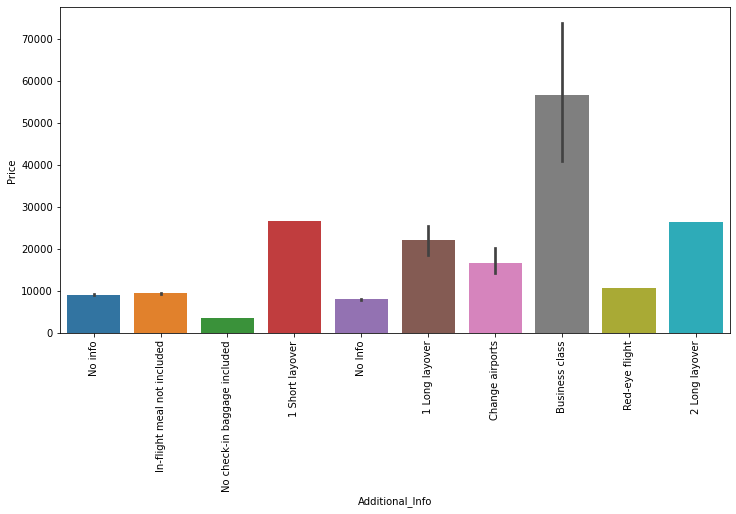

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(df['Additional_Info'],df['Price'])
plt.xticks(rotation=90)

In [44]:
df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [45]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_date,journey_month,dep_hr,dep_min,arival_hr,arival_min,dur_hr,dur_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


# Categorical Variables

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

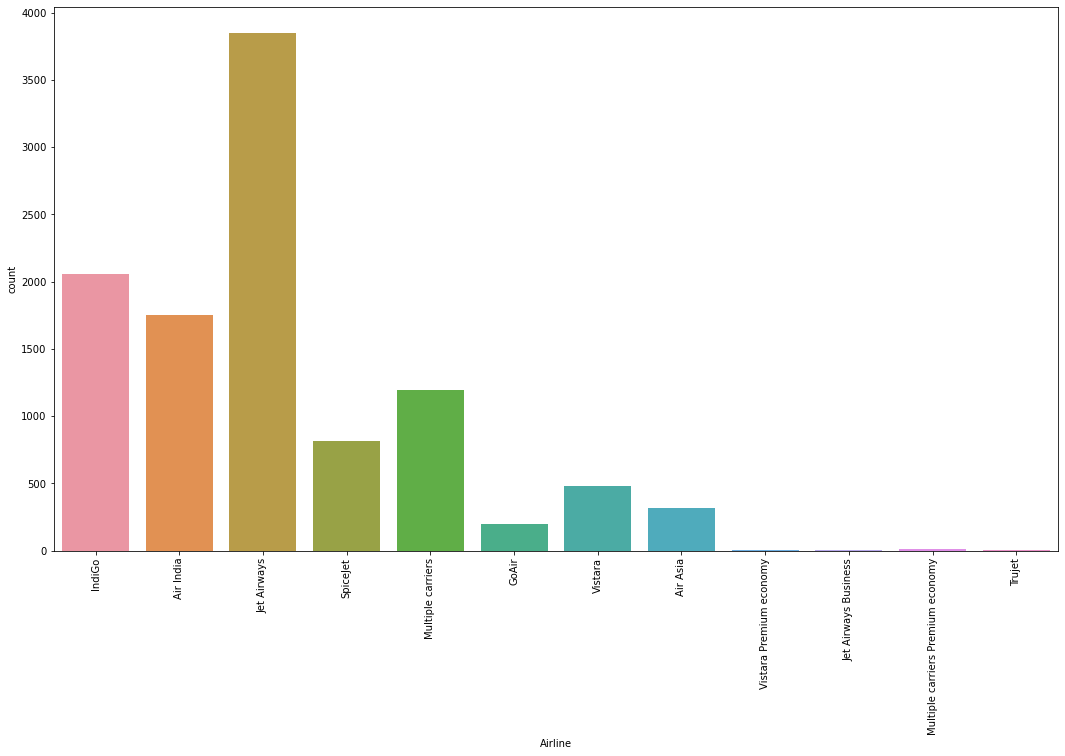

In [46]:
plt.figure(figsize=(18,10))
sns.countplot(df['Airline'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

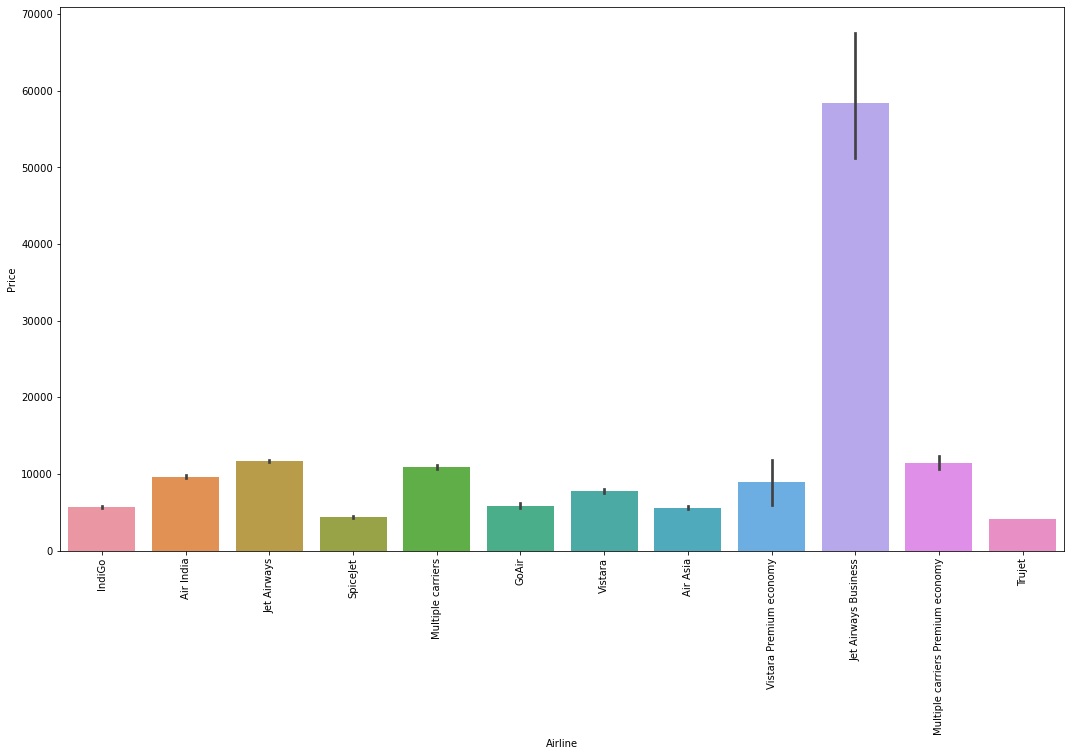

In [47]:
plt.figure(figsize=(18,10))
sns.barplot(df['Airline'],df['Price'])
plt.xticks(rotation=90)

In [48]:
Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [49]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [50]:
source = df['Source']
source = pd.get_dummies(source,prefix='Source',drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [51]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [52]:
destination = df['Destination']
destination = pd.get_dummies(destination,prefix='Destination',drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [53]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [54]:
rep = {
    'non-stop': 0,
    '2 stops': 2,
    '1 stop': 1,
    '3 stops': 3,
    '4 stops': 4

}

In [55]:
df['Stops']=df['Total_Stops'].map(rep)
df.head(18)

,Airline,Source,Destination,Total_Stops,Price,journey_date,journey_month,dep_hr,dep_min,arival_hr,arival_min,dur_hr,dur_min,Stops
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50,0
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25,2
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0,2
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25,1
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45,1
5,SpiceJet,Kolkata,Banglore,non-stop,3873,24,6,9,0,11,25,2,25,0
6,Jet Airways,Banglore,New Delhi,1 stop,11087,12,3,18,55,10,25,15,30,1
7,Jet Airways,Banglore,New Delhi,1 stop,22270,1,3,8,0,5,5,21,5,1
8,Jet Airways,Banglore,New Delhi,1 stop,11087,12,3,8,55,10,25,25,30,1
9,Multiple carriers,Delhi,Cochin,1 stop,8625,27,5,11,25,19,15,7,50,1


In [56]:
df = pd.concat([df,destination,source,Airline],axis=1)
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_date,journey_month,dep_hr,dep_min,arival_hr,arival_min,dur_hr,dur_min,Stops,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0,2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [57]:
df.drop(['Airline','Source','Destination','Total_Stops'],axis=1,inplace=True)
df.head()

,Price,journey_date,journey_month,dep_hr,dep_min,arival_hr,arival_min,dur_hr,dur_min,Stops,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,3897,24,3,22,20,1,10,2,50,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,7662,1,5,5,50,13,15,7,25,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,13882,9,6,9,25,4,25,19,0,2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,6218,12,5,18,5,23,30,5,25,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,13302,1,3,16,50,21,35,4,45,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [58]:
df.shape

(10682, 30)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Price                                      10682 non-null  int64
 1   journey_date                               10682 non-null  int64
 2   journey_month                              10682 non-null  int64
 3   dep_hr                                     10682 non-null  int64
 4   dep_min                                    10682 non-null  int64
 5   arival_hr                                  10682 non-null  int64
 6   arival_min                                 10682 non-null  int64
 7   dur_hr                                     10682 non-null  int64
 8   dur_min                                    10682 non-null  int64
 9   Stops                                      10682 non-null  int64
 10  Destination_Cochin                         106

# Correalation

In [60]:
co = df.corr()
co

,Price,journey_date,journey_month,dep_hr,dep_min,arival_hr,arival_min,dur_hr,dur_min,Stops,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
Price,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,0.603897,0.270676,-0.313417,-0.230755,-0.179223,0.189777,-0.179223,0.270676,0.009358,-0.230755,0.050432,-0.095151,-0.361070,0.416124,0.253303,0.139793,0.017650,-0.296565,-0.010381,-0.060654,-0.000454
journey_date,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940,-0.009451,0.100088,0.002632,-0.014030,0.006611,-0.075254,0.006611,0.100088,-0.060558,-0.014030,-0.032490,-0.003122,0.007281,-0.017304,-0.031713,0.042163,0.030839,0.022154,-0.008569,-0.013169,-0.020115
journey_month,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897,0.054383,0.139222,0.090490,-0.039352,0.005650,-0.453685,0.005650,0.139222,0.087177,-0.039352,-0.045981,-0.004494,-0.048504,0.059735,-0.034787,0.053685,-0.051222,-0.011977,-0.014199,-0.017252,-0.019797
dep_hr,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,-0.061476,-0.118780,0.009469,-0.017292,-0.014846,-0.022138,-0.014846,-0.118780,0.155471,-0.017292,-0.012879,-0.016373,-0.023395,0.113942,-0.007524,-0.149992,-0.028672,-0.010451,0.000857,0.023906,-0.003375
dep_min,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,-0.002618,-0.085534,0.003200,0.037705,0.067110,0.107129,0.067110,-0.085534,-0.024238,0.037705,-0.045688,0.076751,-0.014714,0.024455,0.009168,-0.109370,-0.004624,0.092634,-0.010007,-0.077903,-0.011380
arival_hr,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,0.038140,-0.006790,-0.030867,-0.033512,-0.014795,0.000366,-0.014795,-0.006790,0.054693,-0.033512,0.088872,0.018526,-0.071491,-0.027377,-0.014456,0.067930,0.013491,-0.090058,0.003739,0.068834,0.000776
arival_min,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,-0.106940,-0.209882,0.095250,0.081196,-0.030493,0.021271,-0.030493,-0.209882,0.118573,0.081196,0.061231,0.096839,0.035124,-0.057698,0.005232,-0.167455,-0.001786,0.012543,-0.002750,0.069422,0.000314
dur_hr,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,0.739916,0.299819,-0.346192,-0.233326,-0.186668,0.004052,-0.186668,0.299819,0.123524,-0.233326,0.261707,-0.094044,-0.346230,0.307196,-0.011847,-0.008070,-0.002271,-0.263844,-0.008253,-0.020358,-0.016268
dur_min,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000,-0.136706,-0.154126,0.218207,-0.018761,-0.098823,0.079866,-0.098823,-0.154126,0.013761,-0.018761,-0.033427,0.067215,0.119817,-0.084052,-0.002322,-0.118766,-0.006853,0.041319,-0.007610,0.041952,0.004952
Stops,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,1.000000,0.490170,-0.447390,-0.260752,-0.234758,-0.015302,-0.234758,0.490170,0.032761,-0.260752,0.271094,-0.060110,-0.302991,0.215063,0.017876,0.118399,0.009089,-0.274351,0.002519,-0.120447,-0.020459


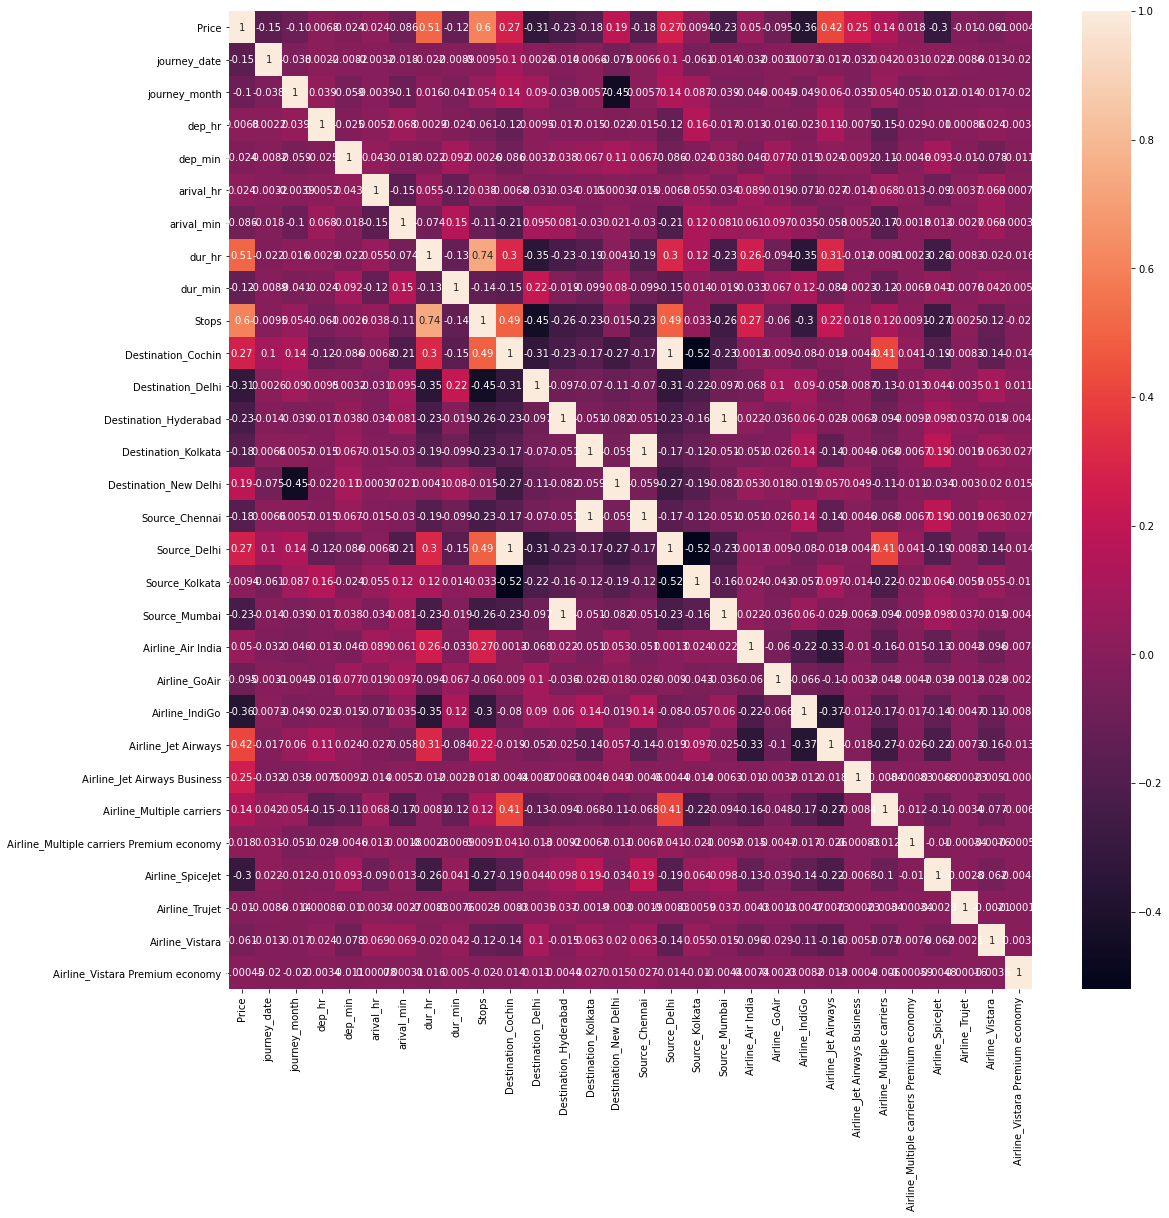

In [61]:
plt.figure(figsize = (18,18))
sns.heatmap(co,annot=True)

In [62]:
X = df.drop('Price',axis=1)
y=df['Price']


In [63]:
from sklearn.ensemble import ExtraTreesRegressor
sel = ExtraTreesRegressor()
sel.fit(X, y)

ExtraTreesRegressor()

In [64]:
print(sel.feature_importances_)

[1.42912604e-01 5.37524471e-02 2.46177812e-02 2.12007936e-02
 2.80496257e-02 1.95427873e-02 1.20322207e-01 1.77959764e-02
 2.32970638e-01 1.26376071e-02 1.38525216e-02 6.88323077e-03
 5.52451322e-04 2.50148680e-02 5.44631780e-04 9.36130261e-03
 3.18308252e-03 5.37377169e-03 1.00003158e-02 1.73706386e-03
 1.64877110e-02 1.36850323e-01 6.75128334e-02 1.99346780e-02
 8.57913146e-04 2.57902601e-03 9.64892042e-05 5.30075588e-03
 7.45631392e-05]


In [65]:
ser = pd.Series(sel.feature_importances_,index=X.columns)
ser

journey_date                                 0.142913
journey_month                                0.053752
dep_hr                                       0.024618
dep_min                                      0.021201
arival_hr                                    0.028050
arival_min                                   0.019543
dur_hr                                       0.120322
dur_min                                      0.017796
Stops                                        0.232971
Destination_Cochin                           0.012638
Destination_Delhi                            0.013853
Destination_Hyderabad                        0.006883
Destination_Kolkata                          0.000552
Destination_New Delhi                        0.025015
Source_Chennai                               0.000545
Source_Delhi                                 0.009361
Source_Kolkata                               0.003183
Source_Mumbai                                0.005374
Airline_Air India           

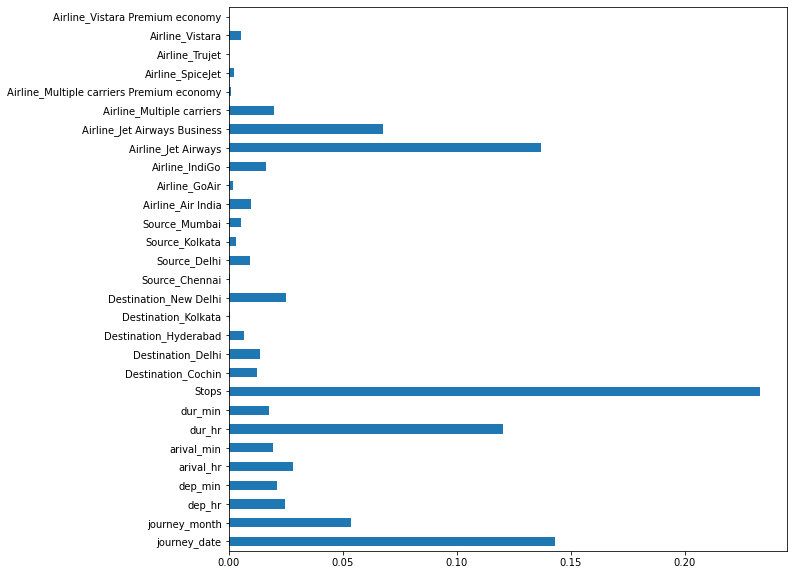

In [66]:
plt.figure(figsize=(10,10))
ser.plot(kind = 'barh')

# Model Traing 

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge,  LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [69]:
X_train.head()

,journey_date,journey_month,dep_hr,dep_min,arival_hr,arival_min,dur_hr,dur_min,Stops,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
10005,27,5,8,30,19,15,10,45,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3684,9,5,11,30,12,35,25,5,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1034,24,4,15,45,22,5,6,20,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3909,21,3,12,50,1,35,12,45,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3088,24,6,17,15,19,15,26,0,2,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [70]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8545, 29), (2137, 29), (8545,), (2137,))

In [71]:

models = [['LinearRegression : ', LinearRegression()],
          ['ElasticNet :', ElasticNet()],
          ['Lasso : ', Lasso()],
          ['Ridge : ', Ridge()],
          ['KNeighborsRegressor : ', KNeighborsRegressor()],
          ['DecisionTreeRegressor : ', DecisionTreeRegressor()],
          ['RandomForestRegressor : ', RandomForestRegressor()],
          ['SVR : ', SVR()],
          ['AdaBoostRegressor : ', AdaBoostRegressor()],
          ['GradientBoostingRegressor : ', GradientBoostingRegressor()],
          ['XGBRegressor : ', XGBRegressor()]]

In [72]:
for name, model in models:
    model=model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print('MSE : ',(np.sqrt(mean_squared_error(y_test, predictions))))
    print('R2score : ',r2_score(y_test,predictions))

LinearRegression : 
MSE :  2863.9705929717807
R2score :  0.61959437290701
ElasticNet :
MSE :  3493.4560542572117
R2score :  0.4339948370624247
Lasso : 
MSE :  2866.0313459544222
R2score :  0.6190467387477879
Ridge : 
MSE :  2867.952888339785
R2score :  0.6185357441757696
KNeighborsRegressor : 
MSE :  3042.5732001603697
R2score :  0.570669349010061
DecisionTreeRegressor : 
MSE :  2397.5523417506706
R2score :  0.7334086719274171
RandomForestRegressor : 
MSE :  2093.4891370784835
R2score :  0.7967403154329721
SVR : 
MSE :  4644.462953401568
R2score :  -0.00041646312498344606
AdaBoostRegressor : 
MSE :  3728.927899898567
R2score :  0.35512165103378723
GradientBoostingRegressor : 
MSE :  2148.922084721926
R2score :  0.785833685953645
XGBRegressor : 
MSE :  1822.3331944153574
R2score :  0.8459841574689339


In [73]:
# XGBRegressor and RandomForestRegressor giving best R2 and MSE values

# HYPERPARAMETER TUNING

In [74]:
grid_params = {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
}

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(),param_grid=grid_params,cv=5,n_jobs=-1,verbose=3)

In [77]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed: 56.8min
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed: 58.4min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [300, 500, 700, 1000, 2100]},
             verbose=3)

In [78]:
grid_search.best_params_

{'max_depth': 13,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 1000}

In [79]:
clf = RandomForestRegressor(n_estimators = 2100, max_depth=13, max_features = 'auto', min_samples_split=2)

In [80]:
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('RandomForest :-')
print('RMSE : {}'.format(np.sqrt(mean_squared_error(y_test, prediction))))
print('R2score : ',r2_score(y_test,prediction))

RandomForest :-
RMSE : 1985.8131350560936
R2score :  0.8171114225806749


In [81]:
clf.predict([[27,5,8,30,19,15,10,45,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0]])

array([8856.14424429])

# Saving the model

In [82]:
#saving model
import pickle
file = open('final_model.pkl', 'wb')
pickle.dump(clf, file)

In [83]:
model = open('final_model.pkl','rb')
forest = pickle.load(model)